In [ ]:
#FDS_COM[AUCM0021199,DIST=STEP]


import FdsPy.qe.myqengine as qe

univ = qe.IdUniverse(['CC_US'])
ts = qe.TimeSeries(start_date='-50Y',end_date = '0M',frequency='M',calendar='FIVEDAY')

data_dict = {'all_comm_prices': 'FLOAT(FDS_COM_DATA("AUCM0021199",#DATE,#DATE,M,STEP,AVERAGE,1))',
             'lumber':'FLOAT(FDS_ECON_DATA("LWM098",#DATE,#DATE,M,STEP,AVERAGE,1))',
             'cattle hide': 'FLOAT(FDS_ECON_DATA("CHM098",#DATE,#DATE,M,STEP,AVERAGE,1))',
             'wheat':'FLOAT(FDS_COM_DATA("WDCM1347713",#DATE,#DATE,M,STEP,AVERAGENP,1))',
             'raw cotton':'FLOAT(FDS_ECON_DATA("RCM098",#DATE,#DATE,M,STEP,AVERAGE,1))',
             'iron and steel': 'FLOAT(FDS_ECON_DATA("ISM098",#DATE,#DATE,M,STEP,AVERAGE,1))'
              }

req = qe.Calculation(universe = univ,dates = ts, data_dict=data_dict,source='FqlExpression')
req.query()

req.data


In [ ]:
df = req.data.set_index('DATE')
df = df.drop(columns =['UNIVERSE'])
df

In [48]:
import pandas as pd
#df.to_csv("../../data/misc/commodity_prices_50y_20230925.csv")
df= pd.read_csv("../../data/misc/commodity_prices_50y_20230925.csv")
df["DATE"] =  pd.to_datetime(df['DATE'], format='%Y%m%d')
#df["DATE"] = df["DATE"].apply(lambda x: x.strftime("%Y-%m-%d"))
df

,DATE,all_comm_prices,lumber,cattle hide,wheat,raw cotton,iron and steel
0,1972-12-29,NaN,52.600,71.100,261.84870,53.500,58.800
1,1973-01-31,NaN,53.000,76.400,266.34525,57.800,64.400
2,1973-02-28,NaN,56.500,76.000,247.40790,59.700,71.900
3,1973-03-30,NaN,60.800,68.700,240.97728,62.300,69.400
4,1973-04-30,NaN,63.900,75.300,249.52500,67.400,67.400
...,...,...,...,...,...,...,...
604,2023-04-28,101.652054,303.442,111.623,899.62500,128.928,651.118
605,2023-05-31,91.335205,302.695,112.486,894.16480,124.773,612.991
606,2023-06-30,89.181260,300.806,108.056,884.70000,125.429,541.367
607,2023-07-31,87.176830,301.669,106.069,893.53750,124.099,533.822


In [49]:
df = df.set_index("DATE")

In [50]:
df = df.astype(float)

In [54]:
df

,all_comm_prices,lumber,cattle hide,wheat,raw cotton,iron and steel
DATE,,,,,,
1972-12-29,NaN,52.600,71.100,261.84870,53.500,58.800
1973-01-31,NaN,53.000,76.400,266.34525,57.800,64.400
1973-02-28,NaN,56.500,76.000,247.40790,59.700,71.900
1973-03-30,NaN,60.800,68.700,240.97728,62.300,69.400
1973-04-30,NaN,63.900,75.300,249.52500,67.400,67.400
...,...,...,...,...,...,...
2023-04-28,101.652054,303.442,111.623,899.62500,128.928,651.118
2023-05-31,91.335205,302.695,112.486,894.16480,124.773,612.991
2023-06-30,89.181260,300.806,108.056,884.70000,125.429,541.367


<Axes: xlabel='DATE'>

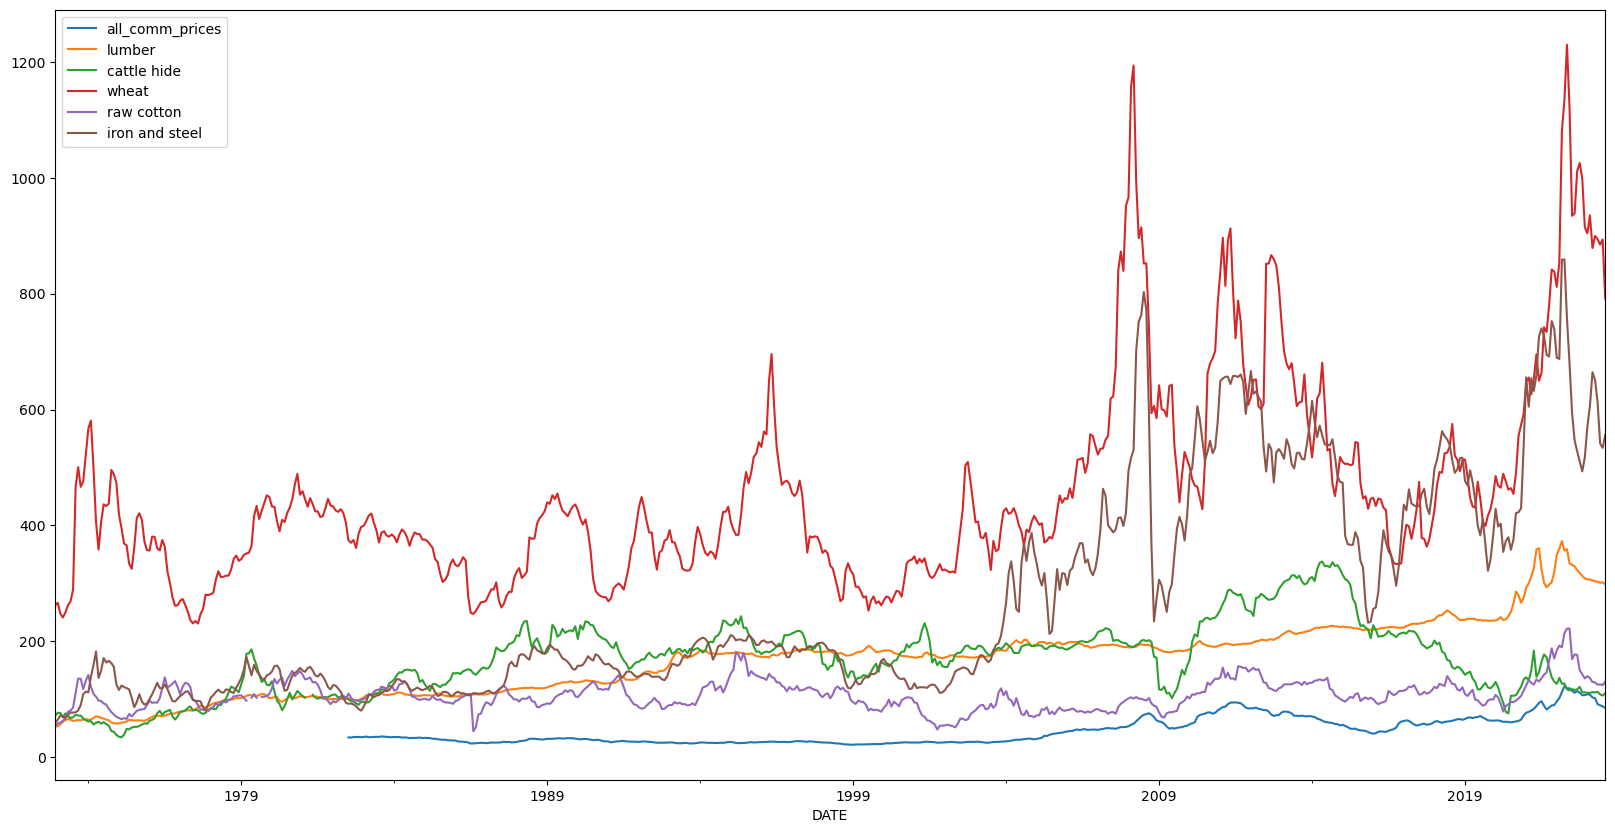

In [52]:
import matplotlib.pyplot as plt
df.plot(figsize = (20,10))

<Axes: xlabel='DATE'>

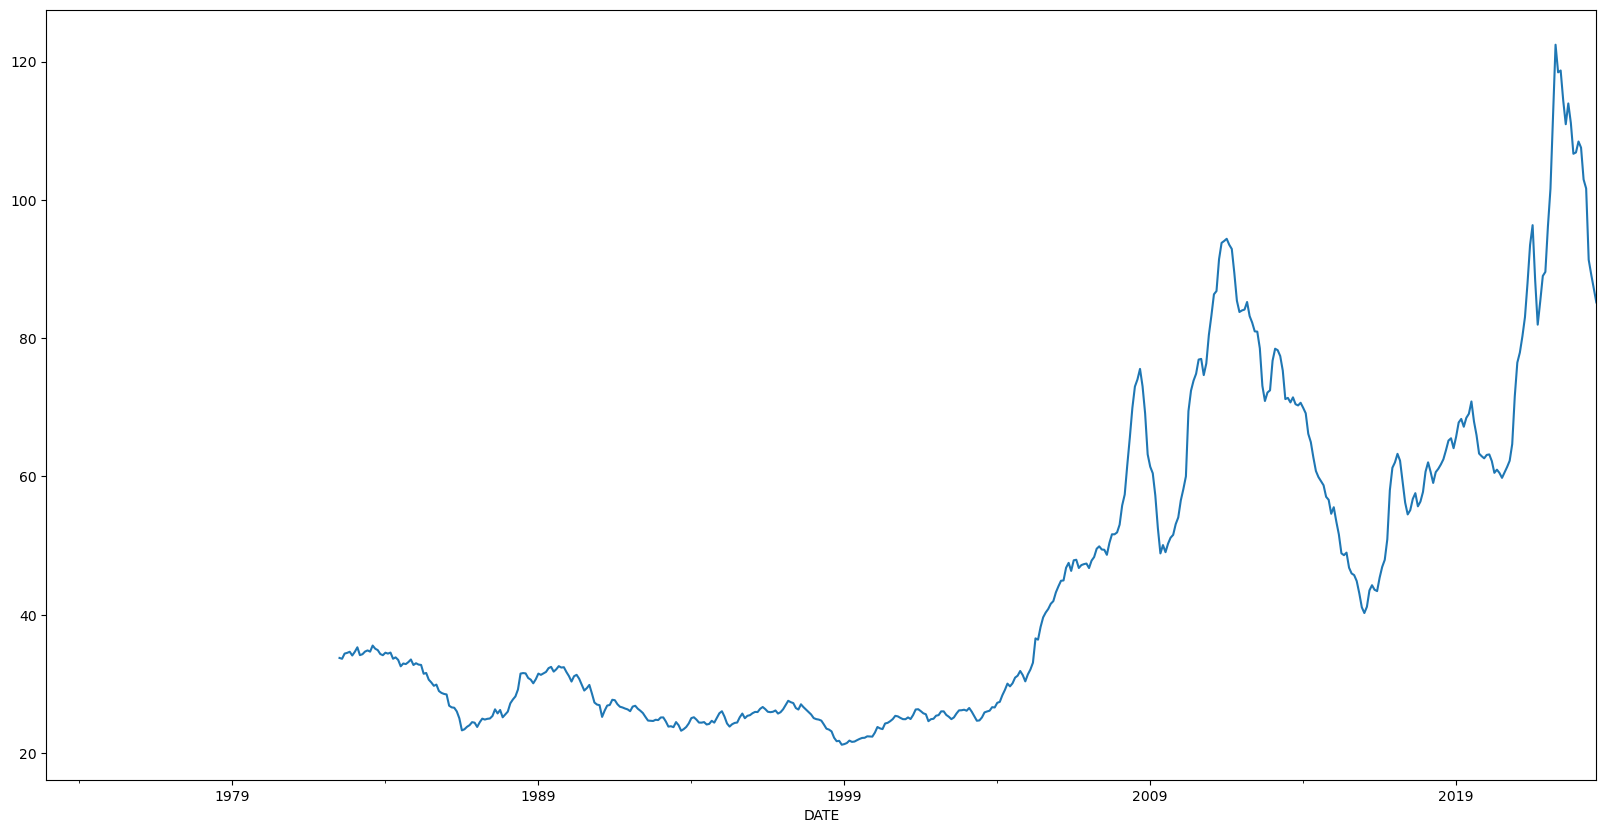

In [53]:
df['all_comm_prices'].plot(figsize = (20,10))

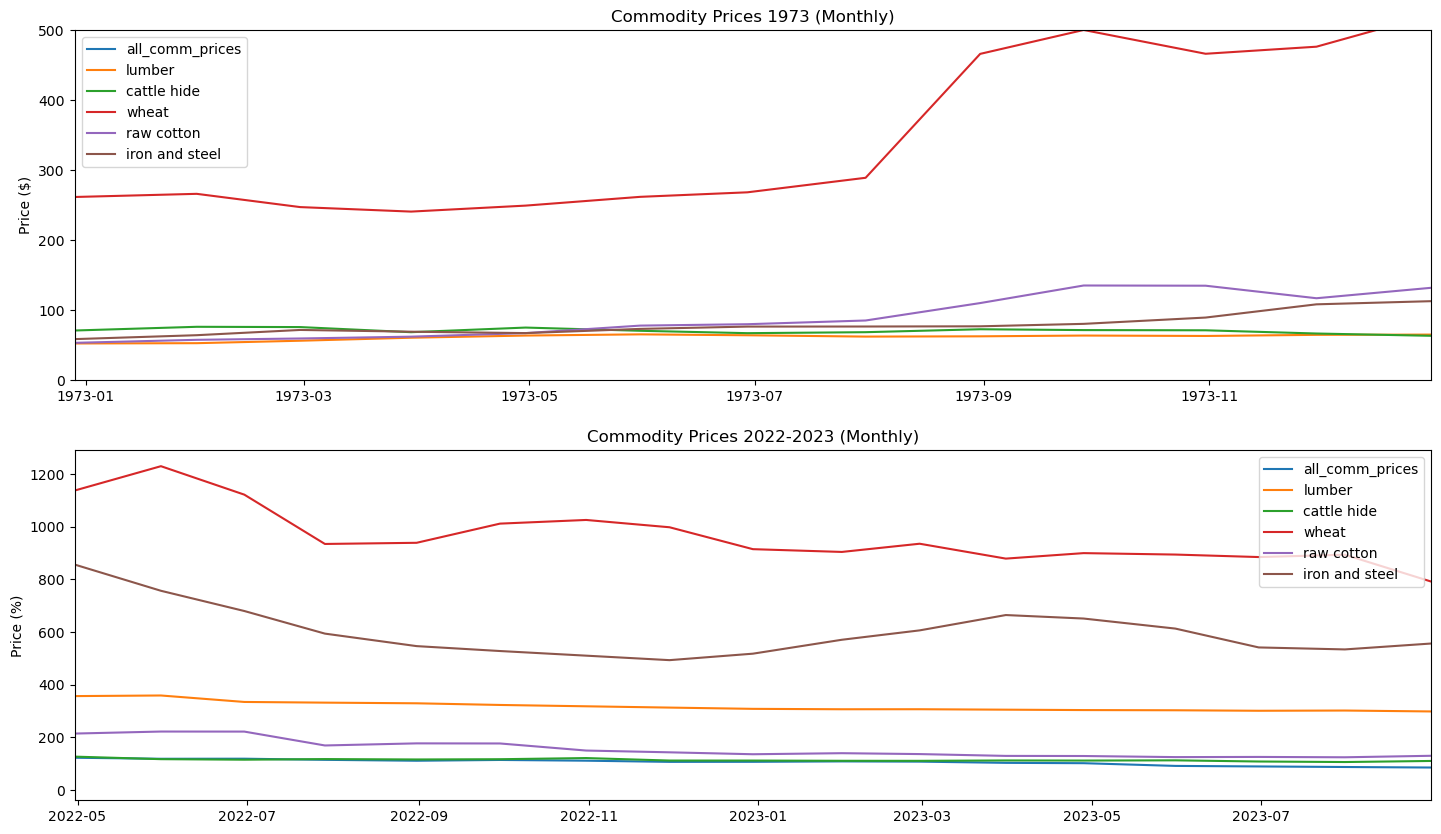

In [69]:
import datetime
fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(df)
axs[0].set_xlim(datetime.datetime(1972, 12, 29), datetime.datetime(1973, 12, 31))
axs[0].set_ylim(0,500)
axs[0].legend(df.columns)
axs[0].set_title('Commodity Prices 1973 (Monthly)')
axs[0].set_ylabel('Price ($)')

axs[1].plot(df)
axs[1].set_xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))
#axs[1].set_ylim(0,10)
axs[1].legend(df.columns)
axs[1].set_ylabel('Price (%)')
axs[1].set_title('Commodity Prices 2022-2023 (Monthly)')
plt.show()

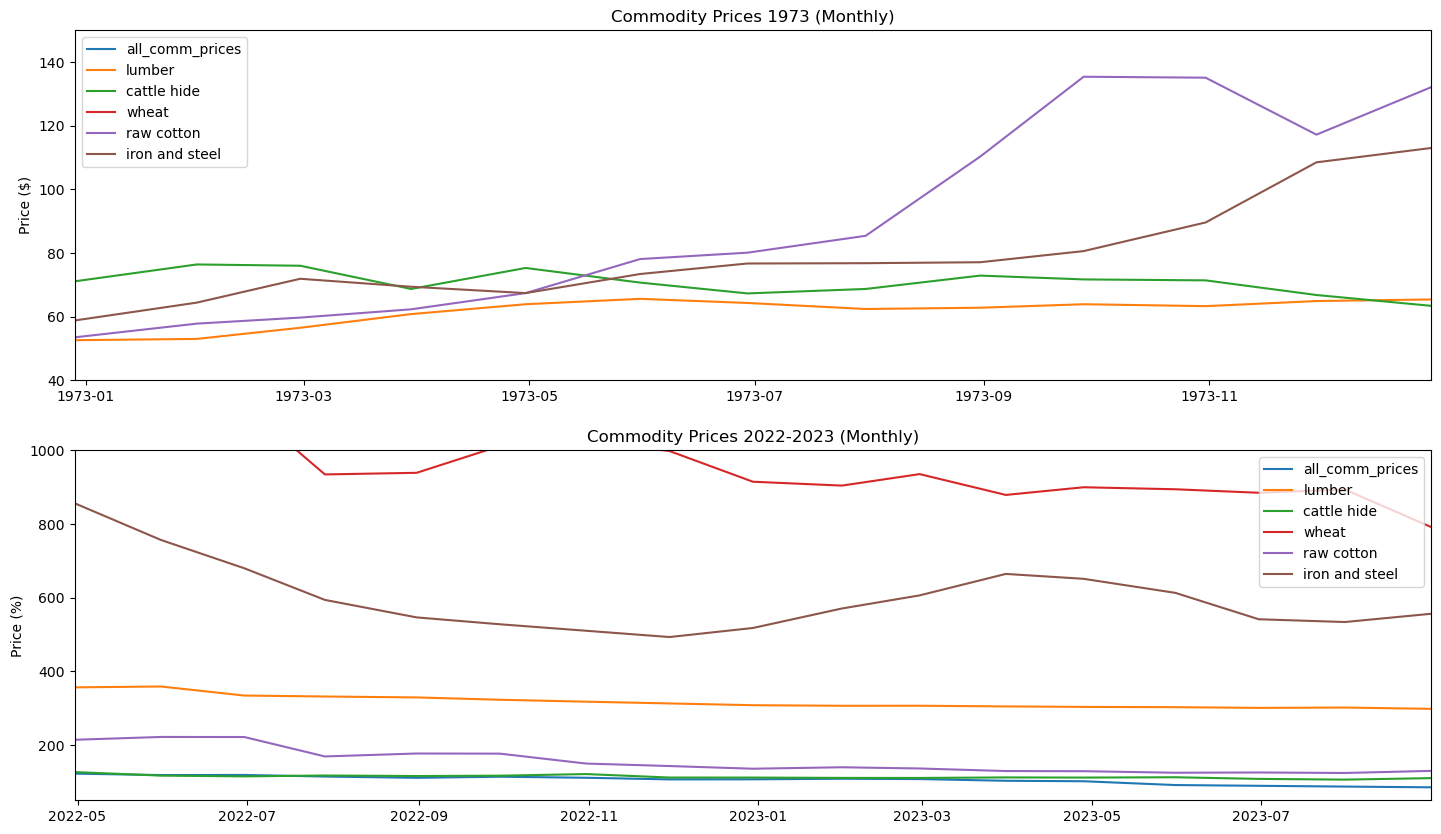

In [70]:
import datetime
fig,axs = plt.subplots(2,1,figsize = (17.5,10))
axs[0].plot(df)
axs[0].set_xlim(datetime.datetime(1972, 12, 29), datetime.datetime(1973, 12, 31))
axs[0].set_ylim(40,150)
axs[0].legend(df.columns)
axs[0].set_title('Commodity Prices 1973 (Monthly)')
axs[0].set_ylabel('Price ($)')

axs[1].plot(df)
axs[1].set_xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))
axs[1].set_ylim(50,1000)
axs[1].legend(df.columns)
axs[1].set_ylabel('Price (%)')
axs[1].set_title('Commodity Prices 2022-2023 (Monthly)')
plt.show()

(19112.0, 19600.0)

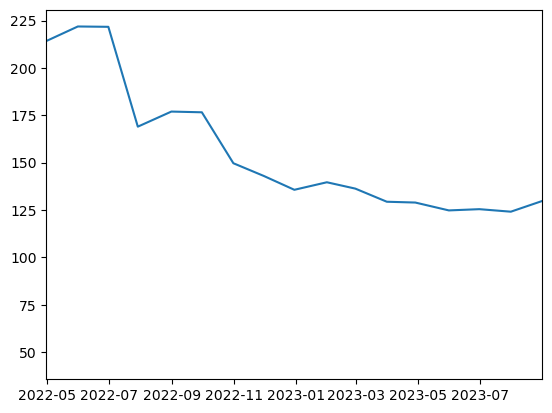

In [68]:
plt.plot(df['raw cotton'])
plt.xlim(datetime.datetime(2022, 4, 30), datetime.datetime(2023, 8, 31))